In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('MorphY3 Range Cluster Elliptical')
i = fits.open('MorphY3 Range Cluster Spiral')

In [3]:
h.info()
i.info()

Filename: MorphY3 Range Cluster Elliptical
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5538,)   uint8   
  1  Joined        1 BinTableHDU    136   16181R x 54C   [J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D, D]   
Filename: MorphY3 Range Cluster Spiral
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5538,)   uint8   
  1  Joined        1 BinTableHDU    136   71850R x 54C   [J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D, D]   


In [4]:
H = h[1].data
I = i[1].data

c = 300000
H_0 = 70

MagI_E = np.array(H.field(31))
MagR_E = np.array(H.field(30))
Z_E = np.array(H.field(41))
MagI_S = np.array(I.field(31))
MagR_S = np.array(I.field(30))
Z_S = np.array(I.field(41))

print(Z_S)

[0.43463486 0.45128843 0.33537036 ... 0.6170392  0.62008113 0.60453969]


In [5]:
Dis_E = (Z_E*c/H_0)*10**6
Dis_S = (Z_S*c/H_0)*10**6

MI_E = MagI_E + 5 - 5*np.log10(Dis_E)
MR_E = MagR_E + 5 - 5*np.log10(Dis_E)
MI_S = MagI_S + 5 - 5*np.log10(Dis_S)
MR_S = MagR_S + 5 - 5*np.log10(Dis_S)

Colour_E = MR_E - MI_E
Colour_S = MR_S - MI_S

16181
71850
88031


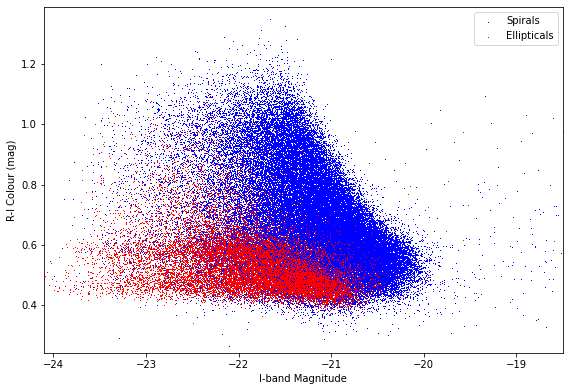

In [13]:
print(len(Colour_E))
print(len(Colour_S))
print(len(Colour_S)+len(Colour_E))

plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(MI_S, Colour_S, s=1, marker="s", linewidth=0, color = 'blue', label = 'Spirals')
plt.scatter(MI_E, Colour_E, s=1, marker="s", linewidth=0, color = 'red', label = 'Ellipticals')

plt.xlim(-24.1, -18.5)
plt.ylim(0.24, 1.39)
plt.xlabel("I-band Magnitude")
plt.ylabel("R-I Colour (mag)")
plt.legend(loc = 'upper right')
